In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from keras import models
from keras import layers
from keras import optimizers
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from statistics import mean

In [ ]:
# def arrange_data(df):
    
#     image_data = []
#     img_paths = np.asarray(df.iloc[:, 0]) #First column is the image paths
    
#     for i in tqdm(range(len(img_paths))):
              
#         img = image.load_img(img_paths[i],target_size=(250,200,3))
#         img = image.img_to_array(img)
#         img = img/255
#         image_data.append(img)
        
    
#     X = np.array(image_data)
#     Y = np.array(df.iloc[:,1:11])
    
#     print("Shape of images:", X.shape)
#     print("Shape of labels:", Y.shape)
    
#     return X, Y


In [ ]:
%cd '/content/drive/MyDrive/Image Perception Group Project/Project'

/content/drive/.shortcut-targets-by-id/12KF3CvuDaqCVMhpzCSbZR55Xfg0EAOKF/Image Perception Group Project/Project


In [ ]:
!dir

1.\ Get_data.ipynb		  Genre\ Sci-Fiv2.csv
2.\ Clean_data.ipynb		  Genre\ Thriller\ Cleaned.csv
3.\ Organise_data.ipynb		  Genre\ Thrillerv2.csv
4.\ Train-1.ipynb		  horror_emotions.csv
5.\ Train-2.py			  hsv_binary_classification.ipynb
6.\ Test-accuracy.ipynb		  hsv-Copy1.ipynb
7.\ Test_single_image.ipynb	  hsv-Copy2.ipynb
abhyuday1.h5			  hsv-copy3\ (Extraction).ipynb
abhyuday2.h5			  hsv-copy3\ (Linear\ Regression).ipynb
Abhyuday-Get_data.ipynb		  hsv-copy4\ (Linear\ Regression).ipynb
abhyuday.h5			  hsv.ipynb
action_hsv.csv			  hsv_wy.ipynb
adventure_emotions.csv		  InceptionResnetv2.ipynb
animation_emotions.csv		  junk\ csv
code_poster_processing.ipynb	  Multi_hot_encoded_data.csv
comedy_emotions.csv		  Multi_hot_encoded_data.gsheet
Copy\ of\ 4.\ Train-1.ipynb	  Multi_hot_encoded_datav2.csv
crime_emotions.csv		  Notebooks
CSV				  Numpy
Dataset				  outliers_removed.csv
Dataset_for_hsv.ipynb		  playing_hsv_data.ipynb
DenseNet-169.ipynb		  Poster_New
densenet169wh_final.h5		  Poster

In [ ]:
X_train = np.concatenate((np.load('./Numpy/Train_X_0_10000.npy'), np.load('./Numpy/Train_X_10001_20000.npy')))#, np.load('./Numpy/Train_X_20001_30000.npy'), np.load('./Numpy/Train_X_30001_40000.npy'), np.load('./Numpy/Train_X_40001_40000++.npy')))

In [ ]:
Y_train = np.concatenate((np.load('./Numpy/Train_Y_0_10000.npy', allow_pickle=True), np.load('./Numpy/Train_Y_10001_20000.npy', allow_pickle=True)))

In [ ]:
Y_train = np.delete(Y_train, 10, 1).astype('Float32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


In [ ]:
X_val = np.load('./Numpy/Train_X_20001_30000.npy')#, np.load('./Numpy/Train_X_20001_30000.npy'), np.load('./Numpy/Train_X_30001_40000.npy'), np.load('./Numpy/Train_X_40001_40000++.npy')))
Y_val = np.load('./Numpy/Train_Y_20001_30000.npy', allow_pickle=True)
Y_val = np.delete(Y_val, 10, 1).astype('Float32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# np.delete(Y_train, 10, 1).astype('Float32').sum(axis=0)

In [ ]:
# print("Processing train..")
# X_train = X_train = np.concatenate((np.load('./Numpy/Train_X_0_30000.npy'),np.load('./Numpy/Train_X_30000_40001.npy') ))
# Y_train = X_train = np.concatenate((np.load('./Numpy/Train_Y_0_10000.npy'), np.load('./Numpy/Train_Y_10001_20000.npy')))

In [ ]:
# np.save('./Numpy/Train_X_0_30000.npy', X_train)

In [ ]:
# print("Processing valid..")
# X_val = np.load('Train_X.npy')
# Y_val = np.load('Train_Y.npy', allow_pickle=True)

In [ ]:
# print("Processing valid..")
# val_df = pd.read_csv("Dataset/Valid.csv", delimiter=" ")
# X_val, Y_val = arrange_data (val_df)

In [ ]:
X_train[0]

array([[[0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        ...,
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334]],

       [[0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        ...,
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334]],

       [[0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        ...,
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334]],

       ...,

       [[0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0.13333334, 0.13333334],
        [0.13333334, 0

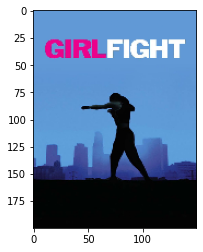

In [ ]:
plt.imshow(X_train[1000])


In [ ]:
# Y_train = np.delete(Y_train, 10, axis=1)
Y_val.sum(axis=0)

array([2130., 1561., 1423., 2837., 1601., 3617., 1711., 1729., 1422.,
       2128.], dtype=float32)

In [ ]:
Y_train[0]

array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [ ]:
num_classes = 10
from keras.applications.resnet50 import ResNet50

model = Sequential()
resnet50 = ResNet50(input_shape = (200,150,3), include_top = False, weights="imagenet")
model.add(resnet50)
model.add(MaxPooling2D())
model.add(Flatten())

# model.add(Dense(units=4096,activation="relu"))
# model.add(layers.Dropout(0.6))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=128,activation="relu"))
# model.add(layers.Dropout(0.5))
model.add(Dense(units=num_classes, activation="sigmoid"))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 5, 2048)        23587712  
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 2, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              12583936  
_________________________________________________________________
dense_6 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 36,304,138
Trainable params: 36,251,018
Non-trainable params: 53,120
_____________________________________

In [ ]:
from keras import backend as K

THRESHOLD = 0.4

@tf.function
def accuracy(y_true, y_pred, threshold_shift=0.5-THRESHOLD):

    # just in case 
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred_bin, 0, 1)))


    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return accuracy
@tf.function
def precision(y_true, y_pred, threshold_shift=0.5-THRESHOLD):

    # just in case 
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)))

    precision = tp / (tp + fp)
    return precision

@tf.function
def recall(y_true, y_pred, threshold_shift=0.5-THRESHOLD):

    # just in case 
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fn = K.sum(K.round(K.clip(y_true - y_pred_bin, 0, 1)))

    recall = tp / (tp + fn)
    return recall

@tf.function
def fbeta(y_true, y_pred, threshold_shift=0.5-THRESHOLD):
    beta = 2

    # just in case 
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall) 



In [ ]:
# from keras.models import load_model

# model = load_model('abhyuday1.h5')


In [ ]:
train_batchsize = 128
validation_batchsize = 128

datagen = ImageDataGenerator(
    rotation_range=20, 
    zoom_range=0.15,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.15,
    horizontal_flip=True, 
    fill_mode="nearest")


# ImageDataGenerator(
#     rotation_range=15,
#     zoom_range=0.15,
#     width_shift_range=0.15,
#     height_shift_range=0.15,
#     horizontal_flip=True,
#     validation_split=0.2)

# train_generator = datagen.flow(
#     x = X_train,
#     y = Y_train,
#     shuffle = True,
#     batch_size=train_batchsize,
#     subset='training') # set as training data

# validation_generator = datagen.flow(
#     x = X_val,
#     y = Y_val,
#     batch_size=validation_batchsize,
#     subset='validation') # set as validation data

# Define your optimizer here
# optim = optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
# model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[accuracy])

# model.compile(loss='categorical_crossentropy',
#               optimizer=optim,
#               metrics=['acc'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('./Notebooks/resnet50.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=2)
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=2,
                          restore_best_weights=True
                          )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)
callbacks_list = [
                  checkpoint,
                  earlystop,
                  reduce_lr]

epochs = 88

EPOCHS=50
BS = 128

history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BS),validation_data=(X_val, Y_val), 
                    steps_per_epoch=len(X_train) // BS, epochs=EPOCHS,
                    verbose=1,
                    callbacks=callbacks_list)

# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=train_generator.n/train_generator.batch_size ,
#       epochs=epochs,
#       validation_data=validation_generator,
#       validation_steps=validation_generator.n/validation_generator.batch_size,
#       verbose=1,
#       callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
156/156 [==============================] - 149s 917ms/step - loss: 0.8187 - accuracy: 0.7665 - val_loss: 0.5053 - val_accuracy: 0.7846

Epoch 00001: val_accuracy improved from -inf to 0.78463, saving model to ./Notebooks/resnet50.h5
Epoch 2/50
156/156 [==============================] - 143s 917ms/step - loss: 0.4348 - accuracy: 0.8074 - val_loss: 0.5066 - val_accuracy: 0.7846

Epoch 00002: val_accuracy did not improve from 0.78463
Epoch 3/50
156/156 [==============================] - 142s 909ms/step - loss: 0.4220 - accuracy: 0.8116 - val_loss: 0.5337 - val_accuracy: 0.7981

Epoch 00003: val_accuracy improved from 0.78463 to 0.79813, saving model to ./Notebooks/resnet50.h5
Epoch 4/50
156/156 [==============================] - 143s 916ms/step - loss: 0.4131 - accuracy: 0.8154 - val_loss: 0.5271 - val_accuracy: 0.7826

Epoch 00004: val_accuracy did not improve from 0.79813

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/50
156/156 [===

In [ ]:
# model.save('Model_6c.h5')

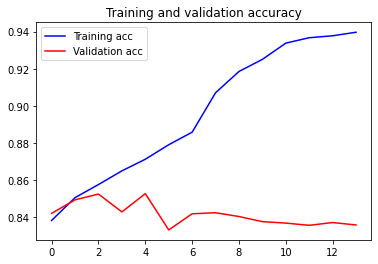

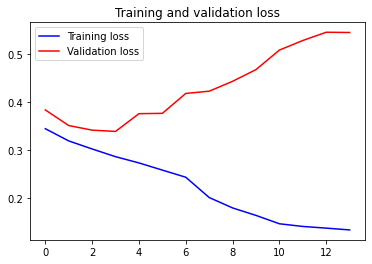

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()